<a href="https://colab.research.google.com/github/s-mallat/FinalProject_AdvCoding3/blob/main/Part1_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FINAL PROJECT <br>[PART 1: STYLEGAN2 ADA]**
Sali Mallat / 20040127 <br>
Advanced Coding 3: Exploring Machine Intelligence <br>
MSc Creative Computing <br><br>
<hr>

### **ATTRIBUTIONS**

This notebook and code are attributed to [Derrick Schultz](https://github.com/dvschultz/stylegan2-ada) and made available by [NVIDIA Corporation License](https://nvlabs.github.io/stylegan2-ada/license.html).
<br>
While this code has been modified by me, please note that I have also used other external source code which I reference when used through out this notebook. Lastly, note that any code not referenced within the code block itself belongs to the original creators of this notebook (Derrick Schultz). Please find a copy of the License [here](https://github.com/dvschultz/stylegan2-ada/blob/main/LICENSE.txt).

    Copyright (c) 2020, NVIDIA Corporation. All rights reserved.
    NVIDIA Source Code License for StyleGAN2 with Adaptive Discriminator Augmentation (ADA)

**Link to Original Github Repo:**

    https://github.com/dvschultz/stylegan2-ada

**For Additional Information on this Model:**

    Tero Karras, Miika Aittala, Janne Hellsten, Samuli Laine, Jaakko Lehtinen, and Timo Aila. 2020. Training generative adversarial networks with limited data. In Proceedings of the 34th International Conference on Neural Information Processing Systems (NIPS'20). Curran Associates Inc., Red Hook, NY, USA, Article 1015, 12104–12114.


<hr>

### **STEP 01: <br>INSTALLATION & SETUP**

In [1]:
#Step 1.1
#Select TF version 1

%tensorflow_version 1.x

TensorFlow 1.x selected.


In [6]:
#Step 1.2
#Free up space on the GPU
!nvidia-smi

Sun Jun 19 11:05:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
#Step 1.3
#Find out what the command (nvidia-smi) does
#Source: https://stackoverflow.com/questions/69986297/what-is-the-nvidia-smi-command-do

!man nvidia-smi

nvidia-smi(1)                       NVIDIA                       nvidia-smi(1)

NNAAMMEE
       nvidia-smi - NVIDIA System Management Interface program

SSYYNNOOPPSSIISS
       nvidia-smi [OPTION1 [ARG1]] [OPTION2 [ARG2]] ...

DDEESSCCRRIIPPTTIIOONN
       nvidia-smi (also NVSMI) provides monitoring and management capabilities
       for each of NVIDIA's Tesla, Quadro, GRID and GeForce devices from Fermi
       and higher architecture families. GeForce Titan series devices are sup‐
       ported for most functions with very limited  information  provided  for
       the  remainder  of  the  Geforce brand.  NVSMI is a cross platform tool
       that supports all standard NVIDIA driver-supported  Linux  distros,  as
       well as 64bit versions of Windows starting with Windows Server 2008 R2.
       Metrics can be consumed directly by users via stdout,  or  provided  by
       file via CSV and XML formats for scripting purposes.

       Note  that much of the func

In [7]:
#Step 1.4
#Add your google drive to colab [This step will require you to give access or permission to colab]

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#Step 1.5
#Create a directory and folders in your drive to host styleGAN2 ADA Github repo

import os
if os.path.isdir("/content/drive/My Drive/colab-sg2-ada"):
    %cd "/content/drive/My Drive/colab-sg2-ada/stylegan2-ada"
else:
    #install script
    %cd "/content/drive/My Drive/"
    !mkdir colab-sg2-ada
    %cd colab-sg2-ada
    !git clone https://github.com/dvschultz/stylegan2-ada
    %cd stylegan2-ada
    !mkdir downloads
    !mkdir datasets

/content/drive/My Drive/colab-sg2-ada/stylegan2-ada


In [9]:
#Step 1.6
#I'm not sure what line 2 and 3 do exactly, but lines 1,3 and 4 
#make sure that the imported repo in the new directory is up-to-date 
#with the original github main repo.

%cd "/content/drive/My Drive/colab-sg2-ada/stylegan2-ada"
!git config --global user.name "test"
!git config --global user.email "test@test.com"
!git fetch origin
!git checkout origin/main -- train.py

/content/drive/My Drive/colab-sg2-ada/stylegan2-ada


### **STEP 02: <br>LOAD DATASET**

**Note: You only need to do this once per dataset. If you have already run this and are returning to conntinue training, skip these cells.**

Next we need to convert our image dataset to a format that StyleGAN2-ADA can read from. There are two options here. You can upload your dataset directly to Colab (as a zipped file), or you can upload it to Drive directly and read it from there.

In [10]:
#Step 2.1
#Cloning my Github repo containing the calligraphy datasets I created.
#This will clone the repo in path specified in Step 1.6

!git clone https://github.com/s-mallat/FinalProject_AdvCoding3

Cloning into 'FinalProject_AdvCoding3'...
remote: Enumerating objects: 296, done.
remote: Counting objects: 100% (296/296), done.
remote: Compressing objects: 100% (271/271), done.
remote: Total 296 (delta 38), reused 268 (delta 21), pack-reused 0
Receiving objects: 100% (296/296), 30.40 MiB | 16.42 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [13]:
#Step 2.2
#Upzip dataset file from the clone repo

zip_path = "/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/FinalProject_AdvCoding3/Datasets/styleGAN_Dataset.zip"

!unzip {zip_path} -d /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/datasets

Archive:  /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/FinalProject_AdvCoding3/Datasets/styleGAN_Dataset.zip
   creating: /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/datasets/NewDataset/
  inflating: /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/datasets/__MACOSX/._NewDataset  
  inflating: /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/datasets/NewDataset/Untitled_Artwork 107.jpg  
  inflating: /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/datasets/__MACOSX/NewDataset/._Untitled_Artwork 107.jpg  
  inflating: /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/datasets/NewDataset/Untitled_Artwork 113.jpg  
  inflating: /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/datasets/__MACOSX/NewDataset/._Untitled_Artwork 113.jpg  
  inflating: /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/datasets/NewDataset/Untitled_Artwork 112.jpg  
  inflating: /content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/datasets/__MACOSX/NewDataset/._Untitled_Artwork 112.jpg  
  in

In [14]:
#Step 2.3
#Convert dataset to .tfrecords format

dataset_path = "/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/datasets/NewDataset"
dataset_name = "NewDataset_TFr"

!python dataset_tool.py create_from_images ./datasets/{dataset_name} {dataset_path}

Loading images from "/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/datasets/NewDataset"
Creating dataset "./datasets/NewDataset_TFr"
dataset_tool.py:97: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  'data': tf.train.Feature(bytes_list=tf.train.BytesList(value=[quant.tostring()]))}))
Added 33 images.


### **STEP 03: <br>TRAIN & GENERATE**

In [15]:
#Step 3.1
#Find all the settings that can be tweaked

!python train.py --help

usage: train.py [-h] --outdir DIR [--gpus INT] [--snap INT] [--seed INT] [-n]
                --data PATH [--res INT] [--mirror BOOL] [--mirrory BOOL]
                [--use-raw BOOL] [--metrics LIST] [--metricdata PATH]
                [--cfg {auto,11gb-gpu,11gb-gpu-complex,24gb-gpu,24gb-gpu-complex,48gb-gpu,48gb-2gpu,stylegan2,paper256,paper512,paper1024,cifar,cifarbaseline,aydao}]
                [--lrate FLOAT] [--ttur BOOL] [--gamma FLOAT] [--nkimg INT]
                [--kimg INT] [--topk FLOAT] [--aug {noaug,ada,fixed,adarv}]
                [--p FLOAT] [--target TARGET] [--initstrength INITSTRENGTH]
                [--augpipe {blit,geom,color,filter,noise,cutout,bg,bgc,bgcf,bgcfn,bgcfnc}]
                [--cmethod {nocmethod,bcr,zcr,pagan,wgangp,auxrot,spectralnorm,shallowmap,adropout}]
                [--dcap FLOAT] [--resume RESUME] [--freezed INT]

Train a GAN using the techniques described in the paper
"Training Generative Adversarial Networks with Limited Data".

optional

In [16]:
#Step 3.2
#I originally wasn't able to get the model to train, but after looking it up online,
#the solution was to downgrade the numpy version to 1.19.5
#Source: https://exerror.com/notimplementederror-cannot-convert-a-symbolic-tensor-2nd_target0-to-a-numpy-array/

!pip install numpy==1.19.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.8 MB 37.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
tensorflow 1.15.2 requires gast==0.2.2, but you have gast 0.5.3 which is incompatible.
lucid 0.3.10 requires numpy<=1.19, but you have numpy 1.19.5 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albument

In [17]:
#Step 3.3
#Train the model
#In train.py, the default kimg (epoch number) for 11gb-gpu is 25000, this will probably take an entire week to train,
#so we will override that to --kimg 100 from the --help command we ran in Step 3.1

dataset_name = "NewDataset_TFr"
snapshot_count = 2
mirrored = True
mirroredY = True
metric_list = None
augs = "bg"
kimgRun = 100

resume_from = "ffhq512"
#resume_from = "/content/drive/MyDrive/colab-sg2-ada/stylegan2-ada/results/00013-CalliNew-mirror-mirrory-11gb-gpu-bg-resumeffhq512/network-snapshot-000104.pkl"

!python train.py --outdir ./results --snap={snapshot_count} --cfg=11gb-gpu --data=./datasets/{dataset_name} --augpipe={augs} --mirror={mirrored} --mirrory={mirroredY} --metrics={metric_list} --resume={resume_from} --augpipe="bg" --kimg={kimgRun}

tcmalloc: large alloc 4294967296 bytes == 0x7044000 @  0x7f52356d2001 0x7f52328d654f 0x7f5232926b58 0x7f523292ab17 0x7f52329c9203 0x593835 0x548c51 0x5127f1 0x549e0e 0x4bca8a 0x532b86 0x594a96 0x548cc1 0x5127f1 0x549576 0x4bca8a 0x5134a6 0x549576 0x4bca8a 0x5134a6 0x549e0e 0x4bca8a 0x5134a6 0x593dd7 0x5118f8 0x549576 0x604173 0x5f5506 0x5f8c6c 0x5f9206 0x64faf2
tcmalloc: large alloc 4294967296 bytes == 0x7f504d028000 @  0x7f52356d01e7 0x7f52328d646e 0x7f5232926c7b 0x7f523292735f 0x7f52329c9103 0x593835 0x548c51 0x5127f1 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x548ae9 0x5127f1 0x593dd7 0x5118f8 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x549e0e
tcmalloc: large alloc 4294967296 bytes == 0x7f4f4c026000 @  0x7f52356d01e7 0x7f52328d646e 0x7f5232926c7b 0x7f523292735f 0x7f51de4f0235 0x7f51dde73792 0x7f51dde73d42 0x7f51dde2caee 0x59371f 0x548c51 0x51566f 0x593dd7 0x511e2c 0x549e0e 0x4bcb19 0x5134a6 0x549576 0x593f

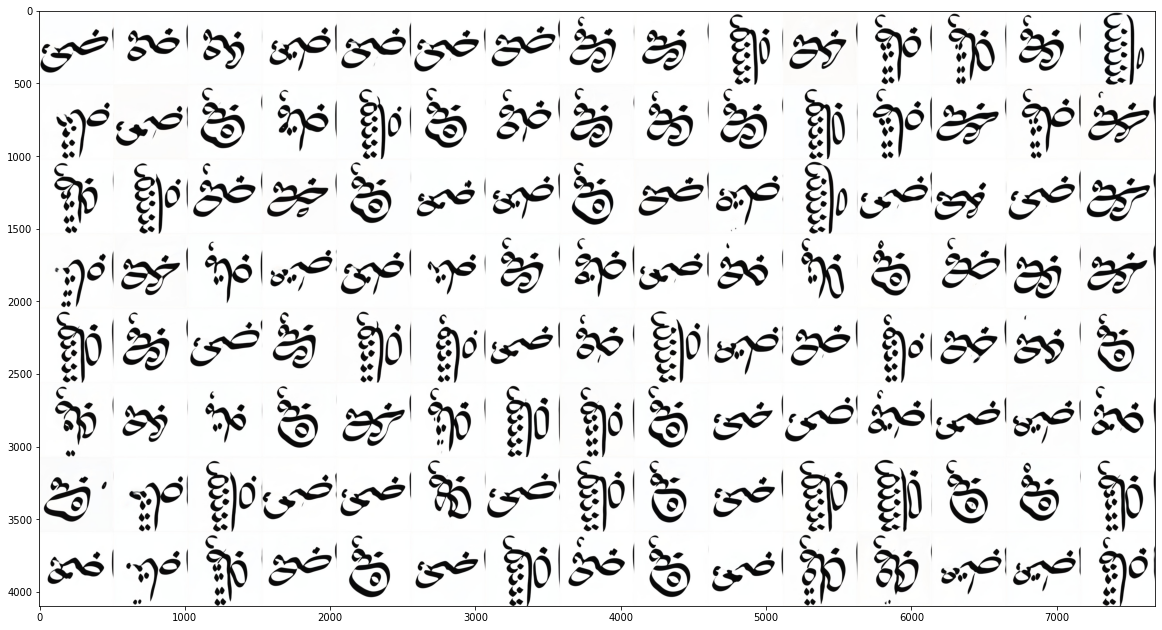

In [20]:
#Step 3.4
#Display results
#Source: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 18))

img = plt.imread('./results/00015-NewDataset_TFr-mirror-mirrory-11gb-gpu-kimg100-bg-resumeffhq512/fakes000100.jpg')
plt.imshow(img)